In this notebook, we are going to plot every model evaluation (MSE) with y and x being its amount of layers and neurons 

In [95]:
#importing every model (file that ends with .h5) in the folder
import os
path = os.getcwd()
files = os.listdir(path)

list_models = []

for file in files:
    #checking if the file ends with .h5
    if file.endswith(".h5"):
        list_models.append(file)

print(list_models)

['model_10_84_5922.h5', 'model_11_229_11603.h5', 'model_11_248_4373.h5', 'model_14_233_8683.h5', 'model_14_57_87547.h5', 'model_14_70_5188.h5', 'model_16_93_7214.h5', 'model_6_167_11108.h5']


In [96]:
#loading the models
from keras.models import load_model
models = []
for model in list_models:
    print(model)
    models.append(load_model(model))

model_10_84_5922.h5
model_11_229_11603.h5
model_11_248_4373.h5
model_14_233_8683.h5
model_14_57_87547.h5
model_14_70_5188.h5
model_16_93_7214.h5
model_6_167_11108.h5


In [97]:
#loading the test data
import pandas as pd
test = pd.read_csv("teste.csv")

target = test["heat_flux"]
dados = test[['conductivity','area','dt','dx','heat_transfer']]


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados = scaler.fit_transform(dados)
target = target.values.reshape(-1,1)
target = scaler.fit_transform(target)


In [99]:
#Now we are going to evaluate every model in the list for the test data
evals = []
preds = []
for model in models:
    mse = model.evaluate(dados,target)
    evals.append(mse)


182/182 [==============================] - 0s 860us/step - loss: 0.0156


In [100]:
#we are going to make a dictionary in which each index has a mse,amount of layers and neurons
dict = {}
for i in range(len(evals)):
    dict[i] = [evals[i],len(models[i].layers)-1,models[i].layers[0].get_config()['units']]

In [101]:
print(dict)

{0: [0.03409072756767273, 10, 84], 1: [0.015966663137078285, 11, 229], 2: [0.06331145018339157, 11, 248], 3: [0.012793065048754215, 14, 233], 4: [0.0019041375489905477, 14, 57], 5: [0.14598914980888367, 14, 70], 6: [0.017790772020816803, 16, 93], 7: [0.015587838366627693, 6, 167]}


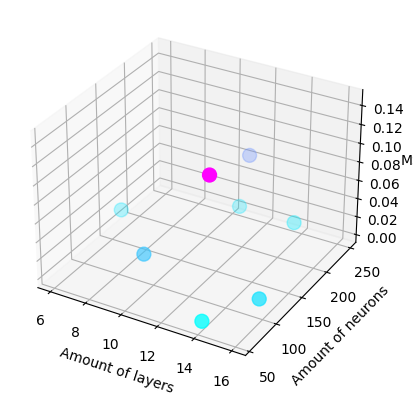

In [102]:
#now that we have the dict, we want to plot the data, with the x being the amount of layers, y the amount of neurons, and the value is the MSE
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []
z = []
for i in dict:
    x.append(dict[i][1])
    y.append(dict[i][2])
    z.append(dict[i][0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#the color of the dots depend on the mse, the lower the msse, the darker the color

ax.scatter(x,y,z,c=z,cmap='cool',marker='o',s=100)
ax.set_xlabel('Amount of layers')
ax.set_ylabel('Amount of neurons')
ax.set_zlabel('MSE')
plt.show()



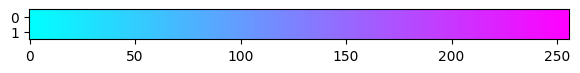

In [103]:
#Plotting the COOL colormap
x = np.linspace(0, 1, 256).reshape(1,-1)
x = np.vstack((x,x))
fig = plt.figure(figsize=(6, 2))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax.imshow(x, aspect='auto', cmap='cool')
plt.show()


In [104]:

#getting the first row of the dataset
first_row = test.iloc[0]["heat_flux"]

In [105]:
#Now we are going to create a list which will hold the prediction of every model of the first index of the data
predictions = []
for model in models:
    predictions.append(model.predict(dados))


182/182 [==============================] - 0s 861us/step


In [106]:
values = []
for i in range(len(predictions)):
    values.append(scaler.inverse_transform(predictions[i])[0][0])

In [ ]:
print(first_row)

In [107]:
print(values)

[30219.604, 28066.55, 37953.902, 30119.621, 30572.486, 35733.117, 29701.078, 27326.654]


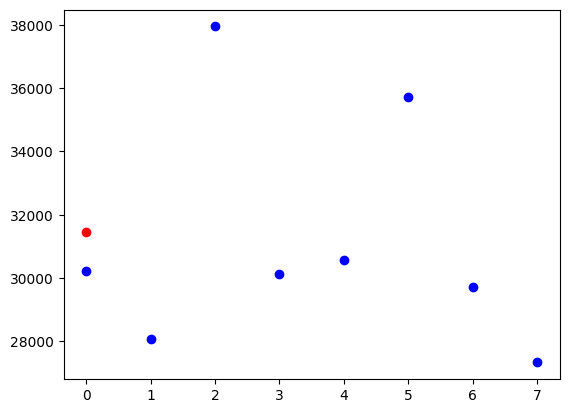

In [108]:
#plotting all poins of the array values with the color blue, the real value is the variable first_row in the color red
plt.scatter(range(len(values)),values,c='b')
plt.scatter(0,first_row,c='r')
plt.show()
